In [55]:
from __future__ import division
import matplotlib
from pylab import *
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import linregress
import numpy as np
import pandas as pd
import math
import h5py

In [56]:
fontSize=16
#matplotlib.rcParams.update({"axes.formatter.limits": (-4,4), "svg.fonttype" : "none", 'font.family':'MathJax_SansSerif', 'font.size': fontSize, "axes.titlesize": fontSize, "xtick.labelsize": fontSize, "ytick.labelsize": fontSize,'text.usetex':False,'text.latex.preamble':[r'\usepackage{sansmath}',r'\sansmath']})
matplotlib.rcParams.update({"axes.formatter.limits": (-4,4), "svg.fonttype" : "none", 'pdf.fonttype':42,'font.family':'DejaVu Sans','font.sans-serif':'Helvetica','font.size': fontSize, "axes.titlesize": fontSize, "xtick.labelsize": fontSize, "ytick.labelsize": fontSize,'text.usetex':False,'text.latex.preamble':[r'\usepackage{sansmath}',r'\sansmath']})
plotStyles={"markersize":8,"markeredgewidth":1.0,"linewidth":3.0}
stepStyles={"markersize":20,"markeredgewidth":3.0,"linewidth":3.0,"where":"post"}
barStyles={"width":0.65, "linewidth":0, "align":"center"}

/Users/turtle/anaconda3/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]


# I. Data check 

In [57]:
df=pd.read_csv('TECAN_210830.csv',delimiter=',',index_col=0)  

In [58]:
df

,1,2,3,4,5,6,7,8,9,10,...,246,247,248,249,250,251,252,253,254,255
Cycle Nr.,,,,,,,,,,,,,,,,,,,,,
Time [s],0.0000,339.1000,678.1000,1017.1000,1356.2000,1776.2000,2115.2000,2454.3000,2793.3000,3201.0000,...,83317.8000,83656.9000,83995.9000,84334.9000,84674.0000,85013.0000,85352.1000,85691.1000,86030.1000,86369.2000
Temp. [C],30.0000,29.9000,29.8000,29.6000,30.0000,30.0000,29.9000,30.0000,29.9000,30.0000,...,30.1000,29.9000,29.9000,30.1000,30.0000,29.9000,30.1000,29.7000,30.1000,30.0000
A1,0.0896,0.0892,0.0891,0.0890,0.0891,0.0891,0.0890,0.0890,0.0890,0.0891,...,0.8368,0.8398,0.8426,0.8445,0.8456,0.8472,0.8466,0.8489,0.8515,0.8536
A2,0.0921,0.0895,0.0899,0.0893,0.0893,0.0892,0.0892,0.0892,0.0892,0.0893,...,0.8422,0.8440,0.8454,0.8467,0.8460,0.8486,0.8509,0.8542,0.8567,0.8597
A3,0.0911,0.0902,0.0901,0.0900,0.0900,0.0901,0.0901,0.0899,0.0901,0.0901,...,0.8176,0.8196,0.8222,0.8241,0.8270,0.8291,0.8318,0.8340,0.8369,0.8385
A4,0.0910,0.0898,0.0897,0.0896,0.0897,0.0898,0.0899,0.0898,0.0899,0.0902,...,0.9133,0.9195,0.9286,0.9427,0.9519,0.9591,0.9637,0.9684,0.9727,0.9762
A5,0.0913,0.0900,0.0898,0.0898,0.0898,0.0900,0.0899,0.0899,0.0900,0.0902,...,0.9340,0.9417,0.9508,0.9599,0.9661,0.9722,0.9782,0.9839,0.9883,0.9930
A6,0.0902,0.0887,0.0885,0.0884,0.0884,0.0886,0.0886,0.0886,0.0887,0.0890,...,1.0082,1.0131,1.0184,1.0258,1.0293,1.0349,1.0402,1.0448,1.0501,1.0547
B1,0.0911,0.0889,0.0889,0.0889,0.0889,0.0890,0.0890,0.0890,0.0892,0.0895,...,1.0210,1.0271,1.0326,1.0401,1.0468,1.0531,1.0581,1.0648,1.0698,1.0748


## check temperature

Text(0, 0.5, 'Temperature (C)')

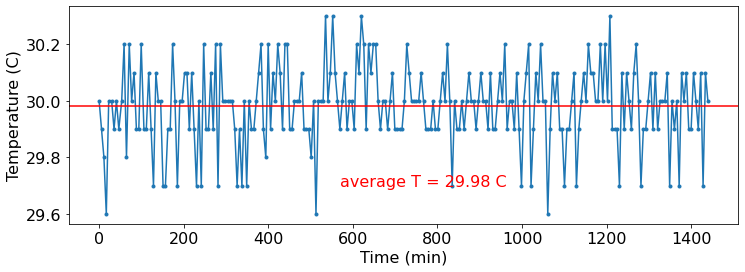

In [59]:
def f_constant(x,c):
    return c
xdata = df.to_numpy()[0]/60;
ydata = df.to_numpy()[1];
param, cov = curve_fit(f_constant, xdata[1:], ydata[1:])
av_T = str(param[0])[:5]
plt.rcParams["figure.figsize"] = (12,4)
plt.plot(xdata, ydata, '.-')
plt.axhline(param[0],color='r')
plt.text(570, 29.7, 'average T = '+av_T+' C', color='red')
plt.xlabel('Time (min)')
plt.ylabel('Temperature (C)')

In [178]:
t_array = df.to_numpy()[0]/60; # in min; 
print(t_array[0])
print(t_array[5])
print(t_array[9])
print(t_array[12])
print(t_array[18])

0.0
29.603333333333335
53.35
71.20333333333333
105.92666666666668


## Check contamination

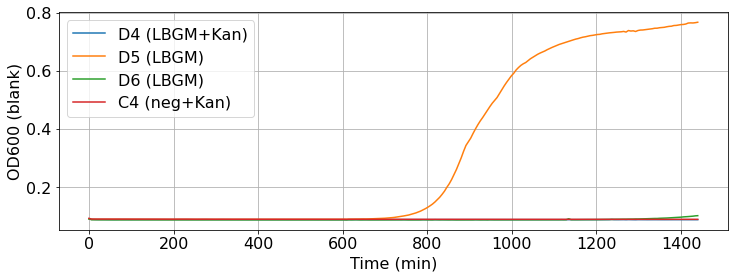

In [60]:
xdata = df.to_numpy()[0]/60;
ydata1 = df.loc['D4'].to_numpy()
ydata2 = df.loc['D5'].to_numpy()
ydata3 = df.loc['D6'].to_numpy()
ydata4 = df.loc['C4'].to_numpy()
ydata5 = df.loc['C5'].to_numpy()
ydata6 = df.loc['C6'].to_numpy()
plt.rcParams["figure.figsize"] = (12,4)
plt.plot(xdata, ydata1,label='D4 (LBGM+Kan)')
plt.plot(xdata, ydata2,label='D5 (LBGM)')
plt.plot(xdata, ydata3,label='D6 (LBGM)')
plt.plot(xdata, ydata4,label='C4 (neg+Kan)')
#plt.plot(xdata, ydata5,label='neg')
#plt.plot(xdata, ydata6,label='neg')
plt.xlabel('Time (min)')
plt.ylabel('OD600 (blank)')
plt.grid('on')
plt.legend()

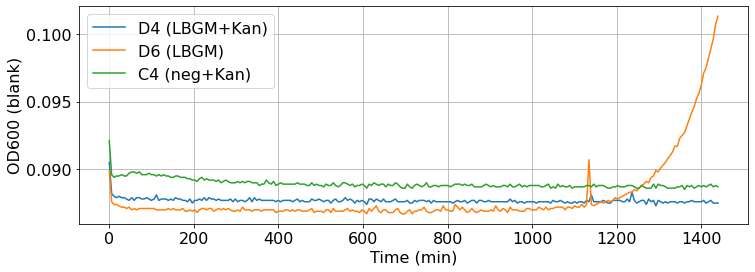

In [61]:
xdata = df.to_numpy()[0]/60;
ydata1 = df.loc['D4'].to_numpy()
ydata2 = df.loc['D5'].to_numpy()
ydata3 = df.loc['D6'].to_numpy()
ydata4 = df.loc['C4'].to_numpy()
ydata5 = df.loc['C5'].to_numpy()
ydata6 = df.loc['C6'].to_numpy()
plt.rcParams["figure.figsize"] = (12,4)
plt.plot(xdata, ydata1,label='D4 (LBGM+Kan)')
#plt.plot(xdata, ydata2,label='D5 (LBGM)')
plt.plot(xdata, ydata3,label='D6 (LBGM)')
plt.plot(xdata, ydata4,label='C4 (neg+Kan)')
#plt.plot(xdata, ydata5,label='neg')
#plt.plot(xdata, ydata6,label='neg')
plt.xlabel('Time (min)')
plt.ylabel('OD600 (blank)')
plt.grid('on')
plt.legend()

## Check other samples

(0.0, 1.5)

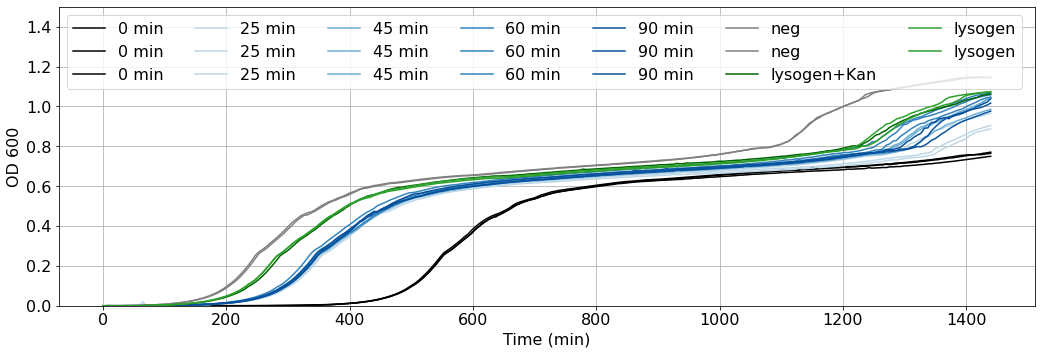

In [54]:
idx = np.arange(2,17,1);
idx = np.concatenate((idx, np.array([18,19,20,21,22])), axis=None)

time = df.to_numpy()[0]/60
empty_sample = df.to_numpy()[idx] - df.loc['C4'].to_numpy()
#labels = df.index[idx].to_list()
labels = ['0 min','0 min','0 min',\
          '25 min','25 min', '25 min', \
          '45 min','45 min', '45 min', \
          '60 min','60 min', '60 min', \
          '90 min','90 min', '90 min', \
          'neg','neg','lysogen+Kan','lysogen','lysogen']; 
colors = ['black','black','black',\
          '#bdd7e7', '#bdd7e7','#bdd7e7',\
          '#6baed6', '#6baed6', '#6baed6',\
          '#3182bd','#3182bd','#3182bd',\
          '#08519c','#08519c','#08519c',\
          'grey','grey','darkgreen','tab:green','tab:green'];
#colors = ['tab:red','darkred','tab:green','darkgreen','tab:blue','darkblue','grey','grey','black','black']
time = df.to_numpy()[0]/60
#mean_empty_sample = np.mean(empty_sample,axis=0)

plt.rcParams["figure.figsize"] = (17.5,5.5)
for i in range(0,len(empty_sample[:,1])):
    plt.plot(time, empty_sample[i,:],alpha=1, label = labels[i], color=colors[i])
#plt.plot(time,mean_empty_sample, linewidth = 2, color='k',label='blank (mean)')
#plt.ylim(0.089,0.1)
plt.legend(ncol=7,loc='upper left')
plt.ylabel('OD 600')
plt.xlabel('Time (min)')
plt.grid('on')
plt.ylim((0,1.5))
#plt.title('MG1655')

(0.0, 800.0)

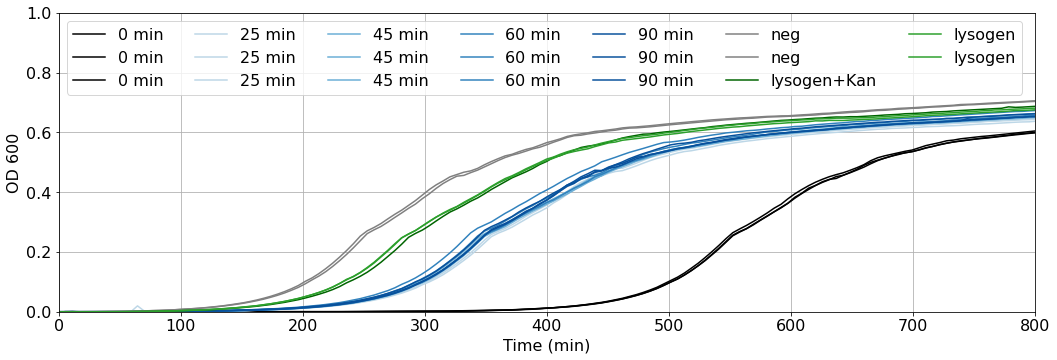

In [40]:
idx = np.arange(2,17,1);
idx = np.concatenate((idx, np.array([18,19,20,21,22])), axis=None)

time = df.to_numpy()[0]/60
empty_sample = df.to_numpy()[idx] - df.loc['C4'].to_numpy()
#labels = df.index[idx].to_list()
labels = ['0 min','0 min','0 min',\
          '25 min','25 min', '25 min', \
          '45 min','45 min', '45 min', \
          '60 min','60 min', '60 min', \
          '90 min','90 min', '90 min', \
          'neg','neg','lysogen+Kan','lysogen','lysogen']; 
colors = ['black','black','black',\
          '#bdd7e7', '#bdd7e7','#bdd7e7',\
          '#6baed6', '#6baed6', '#6baed6',\
          '#3182bd','#3182bd','#3182bd',\
          '#08519c','#08519c','#08519c',\
          'grey','grey','darkgreen','tab:green','tab:green'];
#colors = ['tab:red','darkred','tab:green','darkgreen','tab:blue','darkblue','grey','grey','black','black']
time = df.to_numpy()[0]/60
#mean_empty_sample = np.mean(empty_sample,axis=0)

plt.rcParams["figure.figsize"] = (17.5,5.5)
for i in range(0,len(empty_sample[:,1])):
    plt.plot(time, empty_sample[i,:],alpha=1, label = labels[i], color=colors[i])
#plt.plot(time,mean_empty_sample, linewidth = 2, color='k',label='blank (mean)')
#plt.ylim(0.089,0.1)
plt.legend(ncol=7,loc='upper left')
plt.ylabel('OD 600')
plt.xlabel('Time (min)')
plt.grid('on')
plt.ylim((0,1))
#plt.title('MG1655')
plt.xlim((0,800))

<ipython-input-52-76b616c514b1>:25: RuntimeWarning: invalid value encountered in log2
  plt.plot(time, np.log2(empty_sample[i,:]),alpha=1, label = labels[i], color=colors[i])
<ipython-input-52-76b616c514b1>:25: RuntimeWarning: invalid value encountered in log2
  plt.plot(time, np.log2(empty_sample[i,:]),alpha=1, label = labels[i], color=colors[i])


(0.0, 800.0)

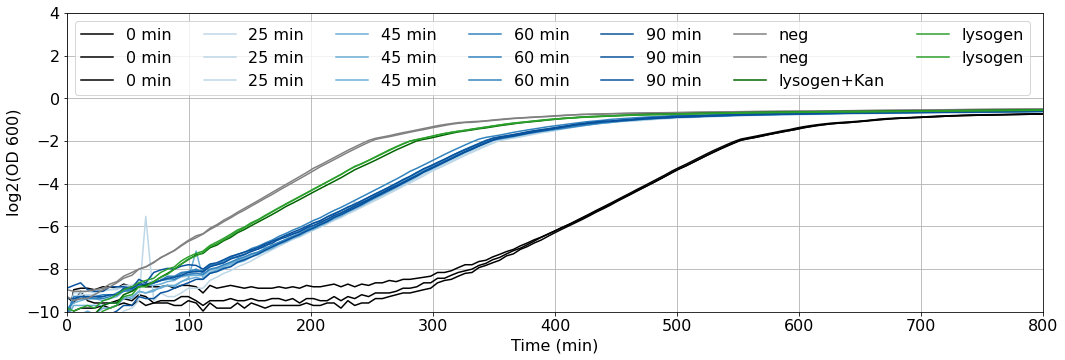

In [52]:
idx = np.arange(2,17,1);
idx = np.concatenate((idx, np.array([18,19,20,21,22])), axis=None)

time = df.to_numpy()[0]/60
empty_sample = df.to_numpy()[idx] - df.loc['D4'].to_numpy()
#labels = df.index[idx].to_list()
labels = ['0 min','0 min','0 min',\
          '25 min','25 min', '25 min', \
          '45 min','45 min', '45 min', \
          '60 min','60 min', '60 min', \
          '90 min','90 min', '90 min', \
          'neg','neg','lysogen+Kan','lysogen','lysogen']; 
colors = ['black','black','black',\
          '#bdd7e7', '#bdd7e7','#bdd7e7',\
          '#6baed6', '#6baed6', '#6baed6',\
          '#3182bd','#3182bd','#3182bd',\
          '#08519c','#08519c','#08519c',\
          'grey','grey','darkgreen','tab:green','tab:green'];
#colors = ['tab:red','darkred','tab:green','darkgreen','tab:blue','darkblue','grey','grey','black','black']
time = df.to_numpy()[0]/60
#mean_empty_sample = np.mean(empty_sample,axis=0)

plt.rcParams["figure.figsize"] = (17.5,5.5)
for i in range(0,len(empty_sample[:,1])):
    plt.plot(time, np.log2(empty_sample[i,:]),alpha=1, label = labels[i], color=colors[i])
#plt.plot(time,mean_empty_sample, linewidth = 2, color='k',label='blank (mean)')
#plt.ylim(0.089,0.1)
plt.legend(ncol=7,loc='upper left')
plt.ylabel('log2(OD 600)')
plt.xlabel('Time (min)')
plt.grid('on')
plt.ylim((-10,4))
#plt.title('MG1655')
plt.xlim((0,800))

# II. Estimation on growth rate

In [67]:
def get_linear_range(time, data, R_square_thresh, plot_yes):
    R_square_thresh = 0.999; 
    
    # skip nan
    start_idx = 0; 
    tmp = np.where(np.isnan(data)==True)[0]
    if len(tmp) > 0:
        start_idx = tmp[-1]
        
    # skip low values
    tmp = np.where(data >= np.log2(0.01))[0]
    if len(tmp) > 0:
        start_idx = max(start_idx, tmp[0])
        
    # choose starting point
    end_idx = min(start_idx+30, len(data)); 
    starting_idx = np.arange(start_idx,end_idx,1);
#    print(start_idx)
#    print(end_idx)
    R_square0 = np.array([]);
    for j in starting_idx:
        xdata = time[j:j+12];
        ydata = data[j:j+12];
        slope, intercept, r_value, _, _ = linregress(xdata, ydata);
        R_square0 = np.append(R_square0, r_value);
    
    if (len(np.where(R_square0>R_square_thresh)[0]) == 0):
        print('fail to find starting points: please lower R_square_thresh');
        return np.array([0,0])
    else:
        j_0 = starting_idx[np.where(R_square0>R_square_thresh)[0][0]];
    
        # choose number of fitting points
        R_square = np.array([]);
        max_points_allowed = len(data)-j_0;
        if max_points_allowed == 0:
            print('fail to find #fitting points: please lower R_square_thresh');
            return np.array([0,0])
        else:
            if max_points_allowed <= 20: #what about = 0? 
                fitting_points = np.array([max_points_allowed]);
            else:
                fitting_points = np.arange(20,min(40,max_points_allowed),1);
            for j in fitting_points:
                xdata = time[j_0:j_0+j];
                ydata = data[j_0:j_0+j];
                slope, intercept, r_value, _, _ = linregress(xdata, ydata);
                R_square = np.append(R_square, r_value);
            tmp2 = np.argmax(R_square);
            j = fitting_points[tmp2]; 
            if plot_yes == True:
                plt.rcParams["figure.figsize"] = (8,7)
                subplot(2,1,1)
                plt.plot(starting_idx, R_square0,'.-');
                plt.axhline(R_square_thresh,color='red');
                plt.axvline(j_0,color='k',alpha = 0.5);
                plt.xlabel('index of fitting start point')
                plt.ylabel('R squared')
                plt.grid(True)
                subplot(2,1,2)
                plt.plot(fitting_points, R_square,'.-');
                plt.axhline(R_square_thresh,color='red');
                plt.axvline(j,color='k',alpha = 0.5);
                plt.xlabel('number of fitting points')
                plt.ylabel('R squared')
                plt.grid(True)
                plt.tight_layout()
            return np.array([j_0, j]);
    

<ipython-input-82-c0442b666d7d>:15: RuntimeWarning: divide by zero encountered in log2
  get_linear_range(time, np.log2(df.to_numpy()[16]-ave_blank), 0, 1)
<ipython-input-82-c0442b666d7d>:15: RuntimeWarning: invalid value encountered in log2
  get_linear_range(time, np.log2(df.to_numpy()[16]-ave_blank), 0, 1)


array([32, 24])

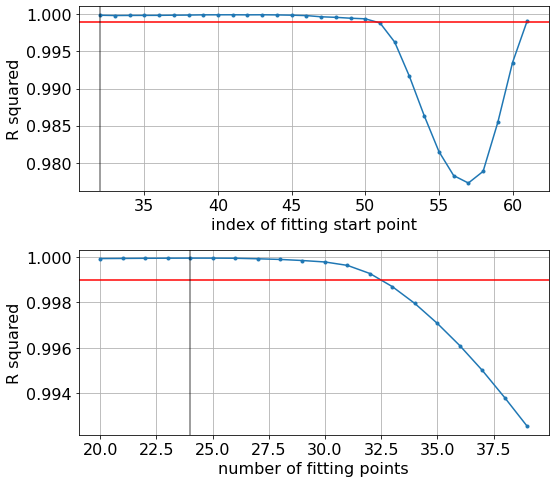

In [82]:
idx_0 = np.array([2,3,4])
idx_25 = np.array([5,6,7]);
idx_45 = np.array([8,9,10]);
idx_60 = np.array([11,12,13]);
idx_90 = np.array([14,15,16]);
idx_neg = np.array([18,19]);
idx_lys = np.array([20,21,22]);
idx_blank = np.array([17,23]);

time = df.to_numpy()[0]/60

ave_blank = np.mean(df.to_numpy()[idx_blank],axis=0)


get_linear_range(time, np.log2(df.to_numpy()[16]-ave_blank), 0, 1)

## estimate growth rate

In [84]:
sample_d = {};

class Sample:
    def __init__(self, name, sample_idx, growth_rate,N0):
        self.sample_name = name
        self.sample_idx = sample_idx
        self.growth_rate = growth_rate
        self.N0 = N0

<ipython-input-95-42a65cab61c1>:14: RuntimeWarning: invalid value encountered in log2
  sample = np.log2(df.to_numpy()[i]-ave_blank);
<ipython-input-95-42a65cab61c1>:14: RuntimeWarning: invalid value encountered in log2
  sample = np.log2(df.to_numpy()[i]-ave_blank);
<ipython-input-95-42a65cab61c1>:14: RuntimeWarning: invalid value encountered in log2
  sample = np.log2(df.to_numpy()[i]-ave_blank);
<ipython-input-95-42a65cab61c1>:14: RuntimeWarning: divide by zero encountered in log2
  sample = np.log2(df.to_numpy()[i]-ave_blank);
<ipython-input-95-42a65cab61c1>:14: RuntimeWarning: invalid value encountered in log2
  sample = np.log2(df.to_numpy()[i]-ave_blank);
<ipython-input-95-42a65cab61c1>:14: RuntimeWarning: divide by zero encountered in log2
  sample = np.log2(df.to_numpy()[i]-ave_blank);
<ipython-input-95-42a65cab61c1>:14: RuntimeWarning: invalid value encountered in log2
  sample = np.log2(df.to_numpy()[i]-ave_blank);


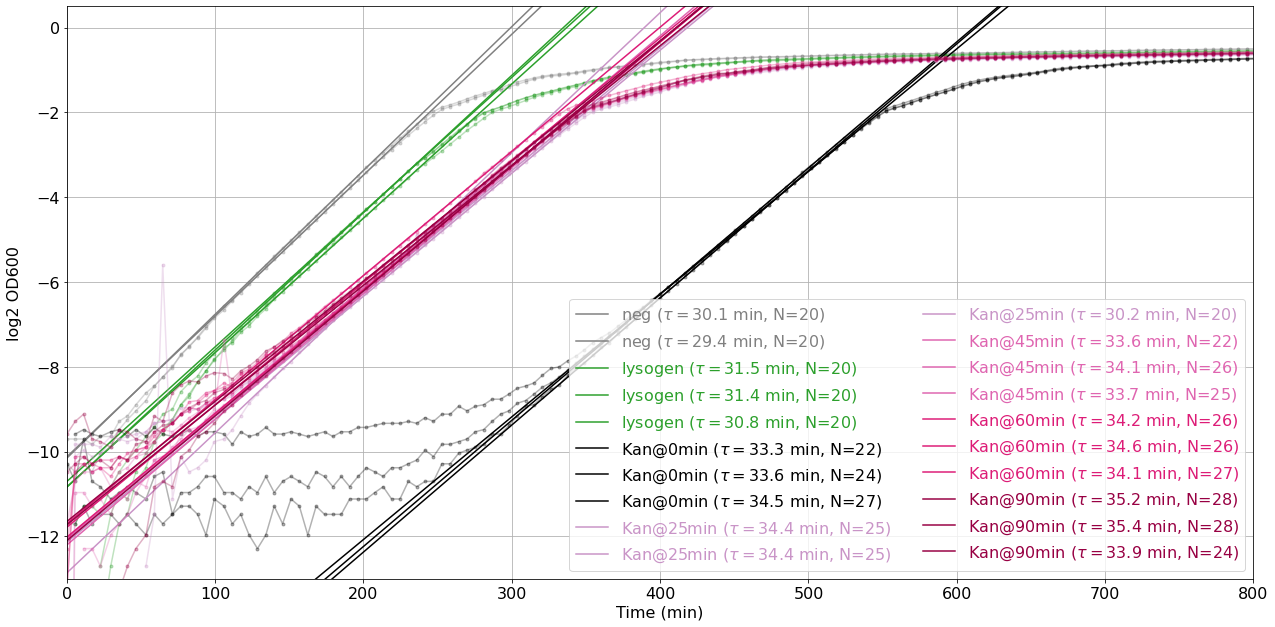

In [95]:
idx_0 = np.array([2,3,4])
idx_25 = np.array([5,6,7]);
idx_45 = np.array([8,9,10]);
idx_60 = np.array([11,12,13]);
idx_90 = np.array([14,15,16]);
idx_neg = np.array([18,19]);
idx_lys = np.array([20,21,22]);

plt.rcParams["figure.figsize"] = (18,9)
k = 0;
labels = ['neg','lysogen','Kan@0min','Kan@25min','Kan@45min','Kan@60min','Kan@90min'];
colors = ['grey','tab:green','black','#c994c7','#df65b0','#dd1c77','#980043'];
for i in (idx_neg, idx_lys, idx_0, idx_25, idx_45, idx_60, idx_90):
    sample = np.log2(df.to_numpy()[i]-ave_blank);
    min_j0 = 1e4;
    max_j = 0; 
    for kk in range(0,len(sample)):
        data = sample[kk,:];
        array_tmp = get_linear_range(time, data, 0.999, 0);
        j_0 = array_tmp[0];
        j = array_tmp[1];
        if j_0 < min_j0:
            min_j0 = j_0; 
        if j+j_0 > max_j:
            max_j = j+j_0; 
        xdata = time[j_0:j_0+j];
        ydata = data[j_0:j_0+j];
        slope, intercept, r_value, _, stderr = linregress(xdata, ydata);
        sample_d[i[kk]] = Sample(labels[k], i[kk], 1/slope, intercept);         
        generation_time = str(1/slope)[:4]; 
        plt.plot(time, data, '.-',color = colors[k], alpha=0.3);
        plt.plot(time, slope*time+intercept, '-', color = colors[k], \
                 label=labels[k]+' ('+r'$\tau=$'+generation_time+' min,'+' N='+str(j)+')')
#        plt.axvspan(time[j_0], time[j_0+j], facecolor=colors[k], alpha=0.05)
    k = k+1; 
plt.xlim((0,800))
plt.ylim((-13,0.5))
plt.legend(labelcolor='linecolor',ncol=2); plt.grid(True);
plt.ylabel('log2 OD600'); plt.xlabel('Time (min)')
plt.tight_layout()

## bar plot summary

Text(0, 0.5, 'doubling time (min)')

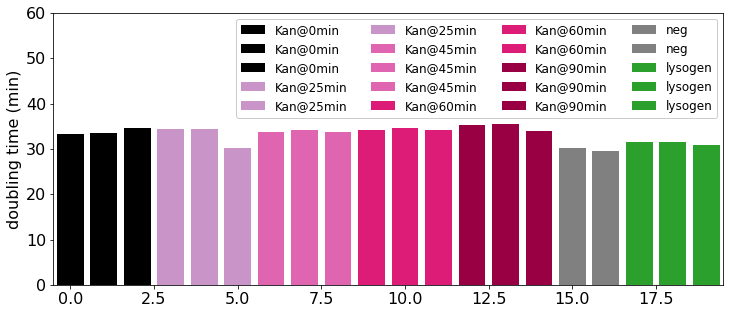

In [107]:
colors_d = {
    'lysogen': 'tab:green',
    'neg': 'grey',
    'Kan@0min': 'black',
    'Kan@25min': '#c994c7',
    'Kan@45min': '#df65b0',
    'Kan@60min': '#dd1c77',
    'Kan@90min': '#980043',
}

kk = 0;
xdata = [];
labels = [];
plt.rcParams["figure.figsize"] = (12,5)

for i in sorted(sample_d.keys()):
    name = sample_d[i].sample_name
    color = colors_d[name]; 
    if name == 'lysogen':
        name = "lysogen    ";
    elif name =='neg':
        name = "neg, no Kan  "
    plt.bar(kk, sample_d[i].growth_rate, color=color,label=sample_d[i].sample_name)
    labels.append(name); 
    xdata.append(kk+1);
#    ydata = np.append(ydata, sample_d[i].growth_rate)
    kk = kk+1;
#plt.grid(True)
'''
plt.axvline(2.5,color='black')
plt.axvline(5.5,color='black')
plt.axvline(8.5,color='black')
plt.axvline(11.5,color='black')
plt.axvline(14.5,color='black')
plt.axvline(16.5,color='black')
'''
plt.ylim((0,60))
plt.xlim((-0.5,19.5))
plt.legend(fontsize=12,ncol=4,framealpha=1)
#plt.xticks([1,5,11,15.5,17.5],['MOI=1','MOI=0.1','MOI=10','neg','lysogen']); 
plt.ylabel('doubling time (min)')

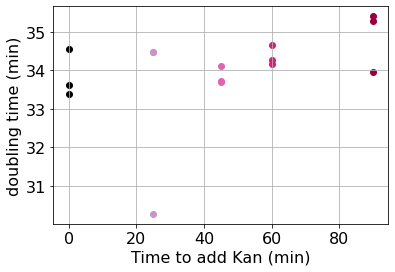

In [111]:
kk = 0;
xdata = [];
ydata = [];
labels = [];
plt.rcParams["figure.figsize"] = (6,4)
'''
plt.axvspan(-1,2.5, facecolor='#238b45', alpha=0.1)
plt.axvspan(2.5,8.5, facecolor='#d7301f', alpha=0.1)
plt.axvspan(8.5,14.5, facecolor='#ce1256', alpha=0.1)
plt.axvspan(14.5,16.5, facecolor='grey', alpha=0.1)
plt.axvspan(16.5,19.5, facecolor='black', alpha=0.1)
'''
for i in sorted(sample_d.keys()):
    name = sample_d[i].sample_name
    color = colors_d[name]; 
    x_ = 0; 
    if "Kan@0min" in name:
        x_ = 0;
    elif "Kan@25min" in name:
        x_ = 25;
    elif "Kan@45min" in name:
        x_ = 45; 
    elif "Kan@60min" in name:
        x_ = 60; 
    elif "Kan@90min" in name:
        x_ = 90; 
    if i in [18,19,20,21,22]:
        next;
    else:
        plt.scatter(x_, sample_d[i].growth_rate, color=color)#,label=sample_d[i].sample_name)
        labels.append(name); 
        xdata.append(x_);
        ydata.append(sample_d[i].growth_rate)
        kk = kk+1;
    
#slope, intercept, r_value, _, stderr = linregress(xdata, ydata);
#x_data = np.array([0,30,60,90])
#plt.plot(x_data, slope*x_data+intercept, 'k-',label='k='+str(slope)[:4]+'; $r^2=$'+str(r_value)[:4])
#plt.ylim((32,48))
#plt.legend(loc='upper left')
#plt.legend(fontsize=12,ncol=2,framealpha=1)
#plt.xticks([1,5,11,15.5,17.5],['MOI=1','MOI=0.1','MOI=10','neg','lysogen']); 
plt.ylabel('doubling time (min)')
plt.xlabel('Time to add Kan (min)')
plt.grid(True)

## check N0

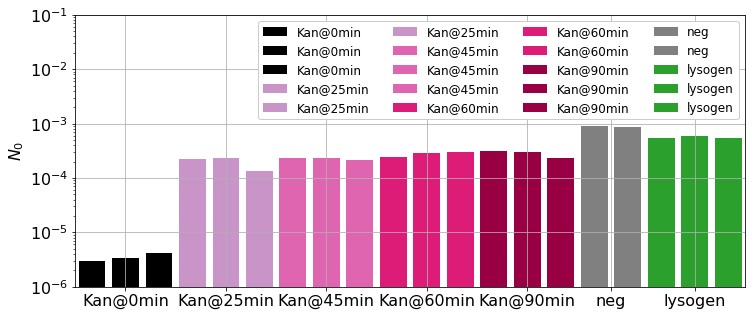

In [139]:
kk = 0;
xdata = [];
labels = [];
plt.rcParams["figure.figsize"] = (12,5)

for i in sorted(sample_d.keys()):
    name = sample_d[i].sample_name
    color = colors_d[name]; 
    if name == 'lysogen':
        name = "lysogen    ";
    elif name =='neg':
        name = "neg, no Kan  "
    plt.bar(kk, np.power(2,sample_d[i].N0), color=color,label=sample_d[i].sample_name)
    labels.append(name); 
    xdata.append(kk+1);
#    ydata = np.append(ydata, sample_d[i].growth_rate)
    kk = kk+1;
#plt.grid(True)
'''
plt.axvline(2.5,color='black')
plt.axvline(5.5,color='black')
plt.axvline(8.5,color='black')
plt.axvline(11.5,color='black')
plt.axvline(14.5,color='black')
plt.axvline(16.5,color='black')
'''
plt.ylim((1e-6,0.1))
plt.yscale('log')
plt.xlim((-0.5,19.5))
plt.legend(fontsize=12,ncol=4,framealpha=1)
plt.xticks([1,4,7,10,13,15.5,18],['Kan@0min','Kan@25min','Kan@45min','Kan@60min','Kan@90min','neg','lysogen']); 
plt.ylabel('$N_0$')
plt.grid(True)

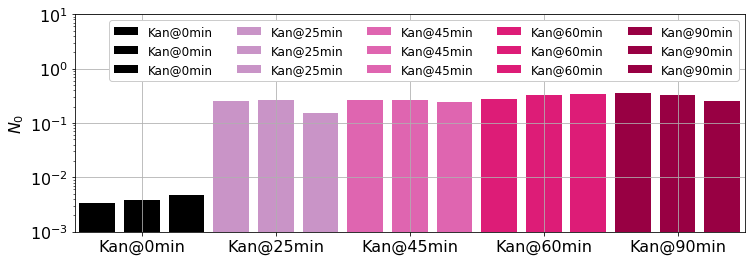

In [136]:
xdata = [];
ydata = []; 
labels = [];

neg_N0 = np.array([]);
for i in idx_neg:
    neg_N0 = np.append(neg_N0, np.power(2,sample_d[i].N0));

plt.rcParams["figure.figsize"] = (12,4)

kk = 0;
for i in sorted(sample_d.keys()):
    name = sample_d[i].sample_name
    color = colors_d[name]; 
    if name == 'lysogen' or name == 'neg':
        next;
    else:
        sample_N0 = np.power(2,sample_d[i].N0); 
        ratio = sample_N0/np.mean(neg_N0); 
        plt.bar(kk, ratio, color=color,label=sample_d[i].sample_name)
        labels.append(name); 
#        xdata.append(kk+1);
        kk = kk+1;

plt.ylim((1e-3,10))
plt.yscale('log')
plt.xlim((-0.5,14.5))
plt.legend(fontsize=12,ncol=5,framealpha=1)
plt.xticks([1,4,7,10,13],['Kan@0min','Kan@25min','Kan@45min','Kan@60min','Kan@90min']); 
plt.ylabel('$N_0$')
plt.grid(True)

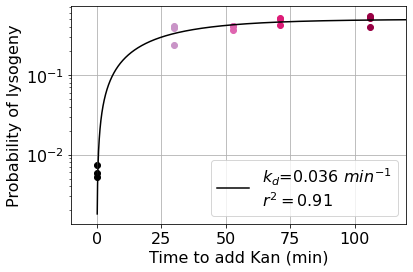

In [179]:
xdata = [];
ydata = []; 
labels = [];

neg_idx = [20,21];
neg_N0 = np.array([]);
for i in neg_idx:
    neg_N0 = np.append(neg_N0, np.power(2,sample_d[i].N0));

kk = 0;
plt.rcParams["figure.figsize"] = (6,4)
for i in sorted(sample_d.keys()):
    name = sample_d[i].sample_name
    if "Kan@0min" in name:
        x_ = 0;
    elif "Kan@25min" in name:
        x_ = 30;
    elif "Kan@45min" in name:
        x_ = 53; 
    elif "Kan@60min" in name:
        x_ = 71;
    elif "Kan@90min" in name:
        x_ = 106; 
    if i in [18,19,20,21,22,23]:
        next;
    else:
        color = colors_d[name]; 
        sample_N0 = np.power(2,sample_d[i].N0); 
        ratio = sample_N0/np.mean(neg_N0); 
        
        plt.scatter(x_, ratio, color=color)#,label=sample_d[i].sample_name)
        labels.append(name); 
        xdata.append(x_);
        ydata.append(ratio)
        kk = kk+1;
        
def model2(t,c,kd):
    return c*(1-np.exp(-kd*t))

#slope, intercept, r_value, _, stderr = linregress(xdata, np.log(ydata));
#plt.plot(x_data, np.exp(slope*x_data+intercept), 'k-',label='k='+str(slope)[:4]+'; $r^2=$'+str(r_value)[:4])
x_data = np.arange(0.1,120,0.01)
xdata = np.array(xdata); ydata=np.array(ydata);
popt, pcov = curve_fit(model2, xdata, ydata,p0=[0.1,1/120])
residuals = ydata - model2(xdata, *popt); 
ss_res = np.sum(residuals**2)
ss_tot = np.sum((ydata-np.mean(ydata))**2)
r_squared = 1 - (ss_res / ss_tot)


plt.plot(x_data, model2(x_data,*popt),'k-',label='$k_d$='+\
         str(popt[1])[:5]+' $min^{-1}$\n$r^2=$'+str(r_squared)[:4])
plt.yscale('log')
plt.xlim((-10,120))
plt.xlabel('Time to add Kan (min)')
plt.legend(loc='lower right')
plt.ylabel('Probability of lysogeny')
plt.grid(True)

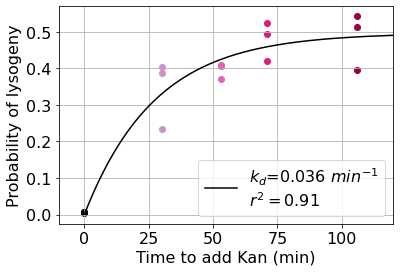

In [180]:
xdata = [];
ydata = []; 
labels = [];

neg_idx = [20,21];
neg_N0 = np.array([]);
for i in neg_idx:
    neg_N0 = np.append(neg_N0, np.power(2,sample_d[i].N0));

kk = 0;
plt.rcParams["figure.figsize"] = (6,4)
for i in sorted(sample_d.keys()):
    name = sample_d[i].sample_name
    if "Kan@0min" in name:
        x_ = 0;
    elif "Kan@25min" in name:
        x_ = 30;
    elif "Kan@45min" in name:
        x_ = 53; 
    elif "Kan@60min" in name:
        x_ = 71;
    elif "Kan@90min" in name:
        x_ = 106; 
    if i in [18,19,20,21,22,23]:
        next;
    else:
        color = colors_d[name]; 
        sample_N0 = np.power(2,sample_d[i].N0); 
        ratio = sample_N0/np.mean(neg_N0); 
        
        plt.scatter(x_, ratio, color=color)#,label=sample_d[i].sample_name)
        labels.append(name); 
        xdata.append(x_);
        ydata.append(ratio)
        kk = kk+1;
        
def model2(t,c,kd):
    return c*(1-np.exp(-kd*t))

#slope, intercept, r_value, _, stderr = linregress(xdata, np.log(ydata));
#plt.plot(x_data, np.exp(slope*x_data+intercept), 'k-',label='k='+str(slope)[:4]+'; $r^2=$'+str(r_value)[:4])
x_data = np.arange(0.1,120,0.01)
xdata = np.array(xdata); ydata=np.array(ydata);
popt, pcov = curve_fit(model2, xdata, ydata,p0=[0.1,1/120])
residuals = ydata - model2(xdata, *popt); 
ss_res = np.sum(residuals**2)
ss_tot = np.sum((ydata-np.mean(ydata))**2)
r_squared = 1 - (ss_res / ss_tot)


plt.plot(x_data, model2(x_data,*popt),'k-',label='$k_d$='+\
         str(popt[1])[:5]+' $min^{-1}$\n$r^2=$'+str(r_squared)[:4])
#plt.yscale('log')
plt.xlim((-10,120))
plt.xlabel('Time to add Kan (min)')
plt.legend(loc='lower right')
plt.ylabel('Probability of lysogeny')
plt.grid(True)